In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import datasets,layers,models
import matplotlib.pyplot as mlt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
y_train.shape

170498071/170498071 [==============================] - 36s 0us/step


(50000, 1)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Changing y_train from 2D array to 1D

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow((X[index]))
    plt.xlabel(classes[y[index]])

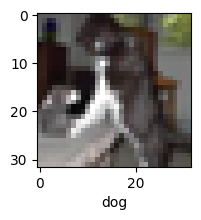

In [16]:
plot_sample(X_train, y_train,277)

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0

In [18]:
X_train[10]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 142s 90ms/step - loss: 1.8098 - accuracy: 0.3564
Epoch 2/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.6233 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5435 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4815 - accuracy: 0.4764
Epoch 5/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4301 - accuracy: 0.4982


Accuracy after 5 epochs is almost 50%

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 21ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.47      0.62      0.54      1000
           1       0.50      0.74      0.60      1000
           2       0.34      0.42      0.37      1000
           3       0.44      0.15      0.22      1000
           4       0.57      0.17      0.27      1000
           5       0.34      0.54      0.42      1000
           6       0.53      0.56      0.54      1000
           7       0.69      0.39      0.50      1000
           8       0.59      0.63      0.61      1000
           9       0.53      0.52      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # Softmax is used to normalize the probability
    layers.Dense(10, activation='softmax'),
])

In [25]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 38ms/step - loss: 1.4709 - accuracy: 0.4704
Epoch 2/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1118 - accuracy: 0.6091
Epoch 3/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9707 - accuracy: 0.6608
Epoch 4/5
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8833 - accuracy: 0.6926
Epoch 5/5
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8133 - accuracy: 0.7153


In [27]:
y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

print("classification report: \n", classification_report(y_test, y_pred_classes_cnn))

313/313 [==============================] - 4s 11ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.70      0.75      0.73      1000
           1       0.89      0.72      0.80      1000
           2       0.54      0.64      0.59      1000
           3       0.54      0.45      0.49      1000
           4       0.66      0.61      0.64      1000
           5       0.56      0.65      0.60      1000
           6       0.71      0.82      0.76      1000
           7       0.77      0.74      0.75      1000
           8       0.86      0.73      0.79      1000
           9       0.76      0.79      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

